# Descriptive Statistics 

Let's pull our file to the notebook and create some visualizations

In [20]:
import pandas as pd
csv_path = "final_output.csv"
df = pd.read_csv(csv_path)

Descriptive Statistics for Age, Height, and Weight

In [21]:
stats = df[(["patient_age", "patient_height", "patient_weight"])]
print(stats.describe())

       patient_age  patient_height  patient_weight
count    41.000000       41.000000       41.000000
mean     41.439024       72.634146      221.902439
std      14.615144        7.415376       38.822548
min      18.000000       61.000000      144.000000
25%      29.000000       65.000000      194.000000
50%      40.000000       73.000000      224.000000
75%      56.000000       79.000000      247.000000
max      64.000000       84.000000      298.000000


Now, we define BMI categories to get average eGFR

In [22]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi < 24.9:
        return "normalweight"
    elif 25 <= bmi < 29.9:
        return "overweight"
    else:
        return "obese"
    
average_egfr = df.groupby(bmi_category)['patient_eGFR'].mean()
print(average_egfr)

normalweight    58.995959
obese           49.663640
overweight      57.753112
underweight     49.844980
Name: patient_eGFR, dtype: float64


Creating a bar chart showing the average eGFR for each BMI category

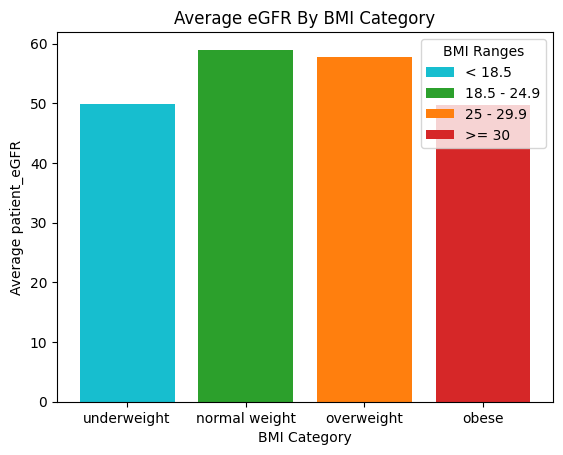

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bmi = ['underweight', 'normal weight', 'overweight', 'obese']
avg_eGFR = [49.844980, 58.995959, 57.753112 , 49.663640]
bar_labels = ['< 18.5', '18.5 - 24.9', '25 - 29.9', '>= 30']
bar_colors = ['tab:cyan', 'tab:green', 'tab:orange', 'tab:red']

ax.bar(bmi, avg_eGFR, label=bar_labels, color=bar_colors)

ax.set_ylabel('Average patient_eGFR')
ax.set_xlabel("BMI Category")
ax.set_title('Average eGFR By BMI Category')
ax.legend(title='BMI Ranges')

plt.show()

Creating a scatter plot: Age vs eGFR

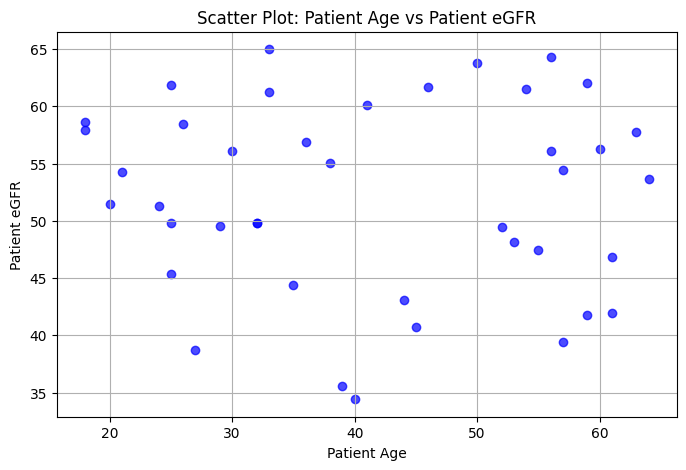

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(df["patient_age"], df["patient_eGFR"], alpha=0.7, color="blue")
plt.title("Scatter Plot: Patient Age vs Patient eGFR")
plt.xlabel("Patient Age")
plt.ylabel("Patient eGFR")
plt.grid(True)
plt.show()


Finally, let's get our sex report

In [25]:
sex_distribution = df["patient_sex"].value_counts()
print(sex_distribution)

patient_sex
M    25
F    16
Name: count, dtype: int64


Displaying the sex distribution on a pie chart

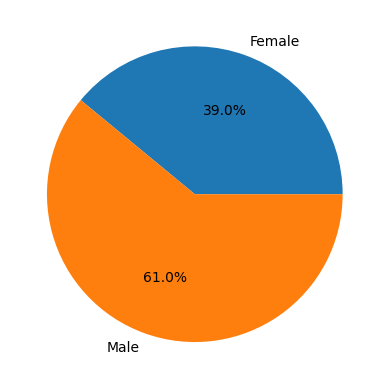

In [26]:
labels = 'Female', 'Male'
sizes = [16, 25]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()